In [1]:
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
import numpy as np
import pandas as pd
import datetime as dt
import scipy.fftpack
from scipy.stats import pearsonr

import bezpy

import models
import plotlib

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


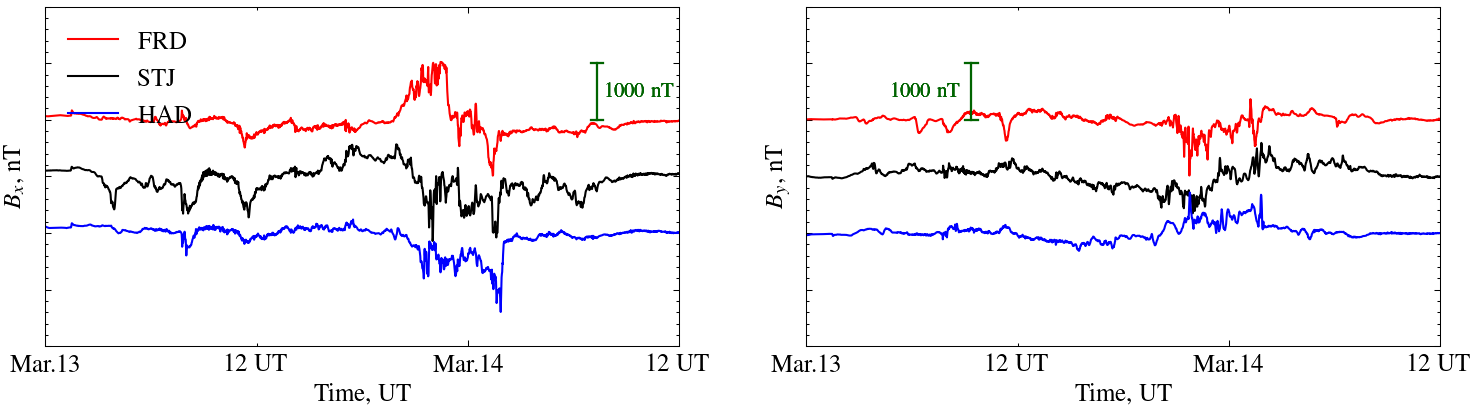

In [2]:
# Figure showing B field variations
stns, coords = ["FRD", "STJ", "HAD"], ["XYZ", "XYZ", "HDZ"]
db="data/{year}/"
dates, frames = [dt.datetime(1989,3,12),dt.datetime(1989,3,13),dt.datetime(1989,3,14)], {}
for stn, coord in zip(stns, coords):
    o = pd.DataFrame()
    for d in dates:
        f = db.format(year=d.year) + "{stn}_{date}_{coord}.txt".format(stn=stn, 
                                                                       date=d.strftime("%Y%m%d"), 
                                                                       coord=coord)
        o = pd.concat([o, bezpy.mag.read_iaga(f)])
    frames[stn] = o
plotlib.plot_xy_magnetic_field_oneplot(stns, frames)

In [3]:
efieldlist, stnlist = [], []
for b, c in zip(range(1,10), ["XYZ"]*7 + ["HDZ"]*2):
    bf = models.BFieldAnalysis([dt.datetime(1989,3,12),dt.datetime(1989,3,13),
                                dt.datetime(1989,3,14)], b, coord=c, plot=False)
    bf.compute_Et()
    efieldlist.append(bf.E_frame)
    stnlist.append(bf.stn)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


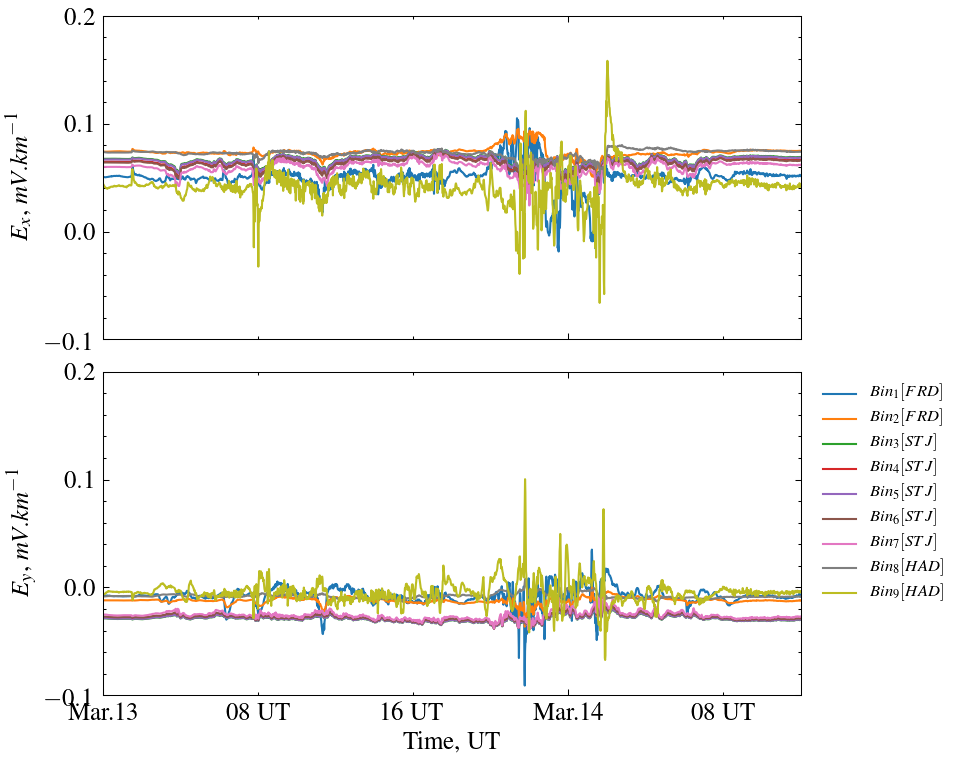

In [4]:
plotlib.plot_xy_electric_field(stnlist, efieldlist)

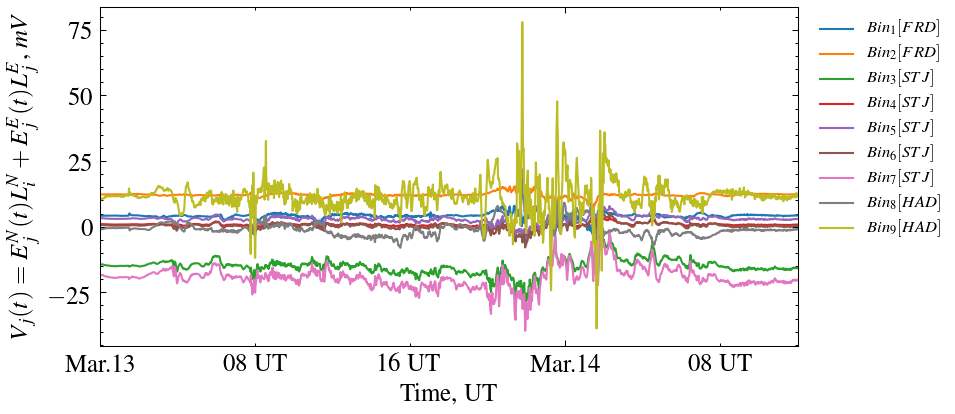

In [5]:
plotlib.plot_induced_potential(stnlist, efieldlist)